Lets see what each of these params do

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from SimulateAndFlux import flux_data_from_params


In [37]:
def inclination_checker(proposals: np.ndarray, indices: tuple[int, int, int, int], r_star: float) -> bool:
    """
    Check if the inclinations of the planets are above the critical value.

    Parameters:
    - proposals: Array of proposals
    - indices: Tuple of indices (a_idx, e_idx, omega_idx, inc_idx)
    - r_star: Radius of the star

    Returns:
    - Boolean indicating if all inclinations are above the critical value
    """

    a_idx, e_idx, omega_idx, inc_idx = indices

    a = proposals[0, :, a_idx]
    e = proposals[0, :, e_idx]
    omega = proposals[0, :, omega_idx]
    inc = proposals[0, :, inc_idx]

    # Calculate the critical inclination
    r = a * (1 - e**2) / (1 + e * np.cos(3* np.pi / 2 - omega))
    critical_inc = np.arccos(r_star / r)

    return np.all(inc >= critical_inc) # Return True if all inclinations are above the critical value

In [38]:
# Keep the same stellar Params
radius_wasp148a = 0.912 * 696.34e6 / 1.496e11
mass_wasp148a = 0.9540 * 2e30 / 6e24

stellar_params = [radius_wasp148a, mass_wasp148a]  # Based on WASP 148

eta1 = 0.3
eta2 = 0.4
# planet_params =[ [ eta,   a,     P,   e,               inc, omega, OHM, phase_lag ] ]
planet_params = np.array(
    [
        [eta1, 0.08215, 3.2, 0.208, np.radians(90), 0, 0, 0, 0.287],
    ]
)
# True inclinations are 89.3 and 104.9 +- some

num_samples = 60000
number_max_period = 4
times_input = np.linspace(0, 2 * 10, 60000)  # Three orbital periods for planet 1


# Define the differnet test params
eta_list = np.linspace(0.1, 0.8, int(0.8/0.1))
a_list = np.linspace(0.05, 0.2, 8)
p_list = np.linspace(3, 9, 3)
e_list = np.linspace(0, 0.7, 4)

r = planet_params[0][1] * (1 - planet_params[0][3]**2) / (1 + planet_params[0][3] * np.cos(3* np.pi / 2 - planet_params[0][6]))
critical_inc = np.arccos((stellar_params[0] *(1 + planet_params[0][0]))  / r)

inc_list = np.linspace(critical_inc, np.pi/2, 8)

omega_list = np.linspace(-2*np.pi, 2 * np.pi, 10)
ohm_list = np.linspace(0, 2*np.pi, 8)
phase_lag_list = np.linspace(0, 2*np.pi, 8)
varied_param_list = [r"\eta", "a", "P", "e", "inc", "omega", "big_ohm", "phase_lag"]


In [39]:
def plot_param(varied_param, varied_param_list, times, fluxes, time_bounds = None):
    plt.figure(f"Varying {varied_param}")
    plt.title(f"Varying {varied_param}")
    if type(times[0]) == np.float64:
        for i, varied_param_val in enumerate(varied_param_list):
            plt.plot(times, fluxes[i], label=f"{varied_param} = {round(varied_param_val,2)}")
        plt.legend()
        if time_bounds:
            plt.xlim(time_bounds)
        else:
            plt.xlim(0, (times[-1] + 10))

    else:
        for i, varied_param_val in enumerate(varied_param_list):
            plt.plot(times[i], fluxes[i], label=f"{varied_param} = {round(varied_param_val,2)}")
        plt.legend()
        if time_bounds:
            plt.xlim(time_bounds)
        else:
            end_time = np.max(times)
            plt.xlim(0, (end_time + 10))
    plt.xlabel("Time")
    plt.ylabel("Flux")
    plt.show()

    

In [40]:
def get_fluxes_for_param(stellar_params, times_input, planet_params, varied_index, varied_list):
    planet_params = planet_params[:, :-1]
    fluxes = []
    for i in range(len(varied_list)):
        planet_params[0][varied_index] = varied_list[i]
        fluxes.append(flux_data_from_params(stellar_params=stellar_params, planet_params=planet_params, times=times_input, analytical_bool=True))
    
    return fluxes
        
    


In [41]:
def determine_transit_length(times, flux, index = False):
    # Find the first time the flux is less than 1
    if index != False:
        during_transit_index = np.where(flux == np.min(flux))[0][index]
    else:
        during_transit_index = np.where(flux == np.min(flux))[0][len(np.where(flux == np.min(flux))[0])//2]
    start = 0
    for i in range(len(flux[:during_transit_index])):

        j = int(during_transit_index - i)
        if flux[j] == 1:
            start = j
            break
    # Find the last time the flux is less than 1
    end = 0
    for k in range(len(flux[during_transit_index:])):
        k += during_transit_index
        if flux[k] == 1:
            end = k
            break
    return (times[start], times[end])

Vary Eta

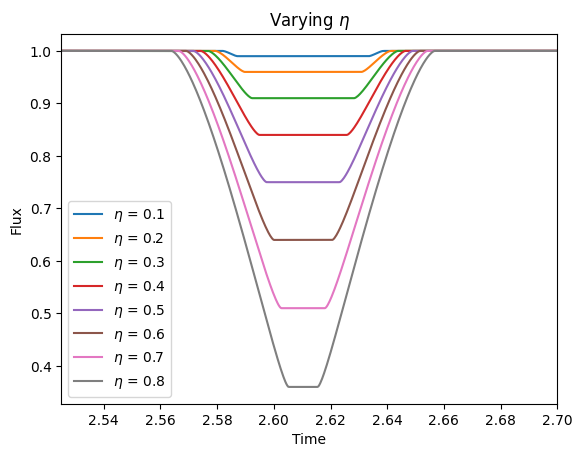

In [42]:
planet_params_new = planet_params.copy()
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 0, eta_list)

plot_param(r"$\eta$", eta_list, times_input, fluxes, time_bounds = (2.525,2.7))

200 0.3


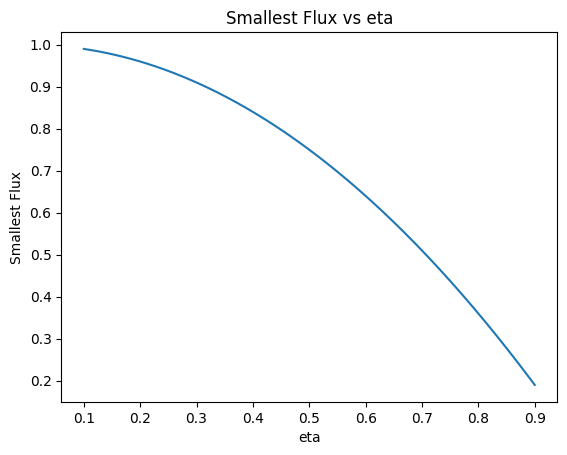

In [43]:
planet_params_new = planet_params.copy()
times_input_2 = np.linspace(0, 2 * 10, 600000)  # Lets go higher time resolution
eta_list_2 = np.linspace(0.1, 0.9, 200)
fluxes2 = get_fluxes_for_param(stellar_params, times_input_2, planet_params_new, 0, eta_list_2)
smallest_flux = []
for i in fluxes2:
    smallest_flux.append(min(i))

print(len(smallest_flux), planet_params[0][0])

plt.plot(eta_list_2, smallest_flux)
plt.title("Smallest Flux vs eta")
plt.xlabel("eta")
plt.ylabel("Smallest Flux")

plt.show()

semi-major axis

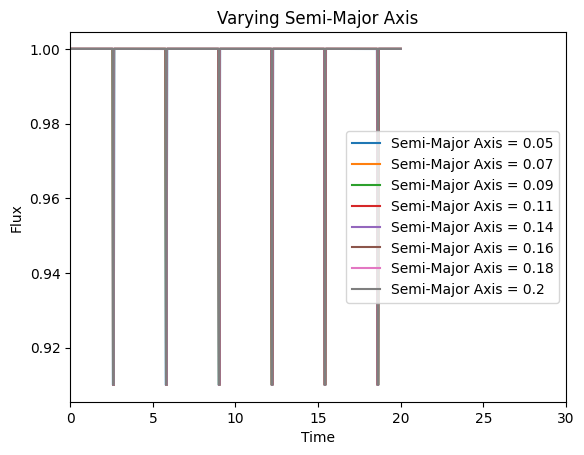

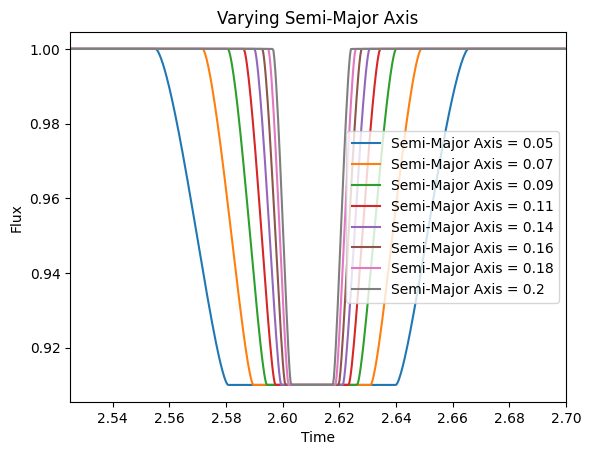

100 0.3


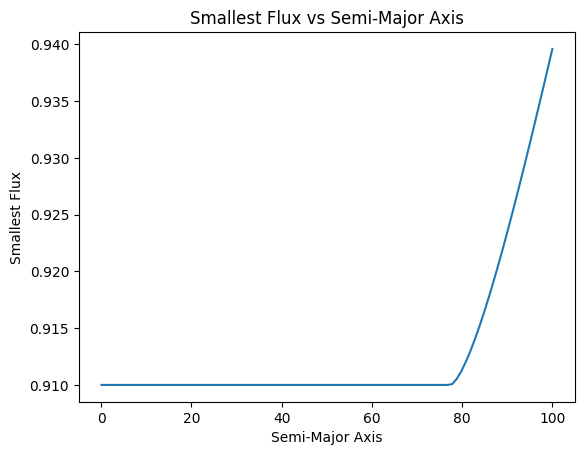

In [44]:
planet_params_new = planet_params.copy()
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 1, a_list)
plot_param(r"Semi-Major Axis", a_list, times_input, fluxes)
plot_param(r"Semi-Major Axis", a_list, times_input, fluxes, time_bounds = (2.525,2.7))


smallest_flux = []
a_list2 = np.linspace(0.05, 100, 100)
fluxes2 = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 1, a_list2)
for i in fluxes2:
    smallest_flux.append(min(i))

print(len(smallest_flux), planet_params[0][0])

plt.plot(a_list2, smallest_flux)
plt.title("Smallest Flux vs Semi-Major Axis")
plt.xlabel("Semi-Major Axis")
plt.ylabel("Smallest Flux")

plt.show()



This trend upwards is interesting -> Could it be time steps acting such that we never get a time mid transit?

100 0.3


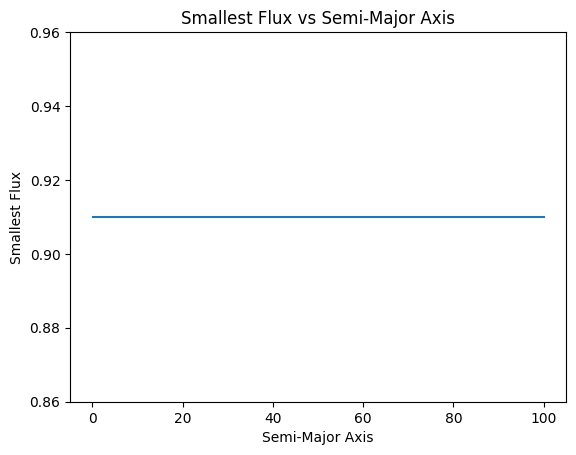

In [45]:
planet_params_new = planet_params.copy()
times_input_2 = np.linspace(0, 2 * 10, 600000)  # Lets go higher time resolution
smallest_flux = []
a_list2 = np.linspace(0.05, 100, 100)
fluxes2 = get_fluxes_for_param(stellar_params, times_input_2, planet_params_new, 1, a_list2)
for i in fluxes2:
    smallest_flux.append(min(i))

print(len(smallest_flux), planet_params[0][0])

plt.plot(a_list2, smallest_flux)
plt.title("Smallest Flux vs Semi-Major Axis")
plt.xlabel("Semi-Major Axis")
plt.ylabel("Smallest Flux")

plt.show()

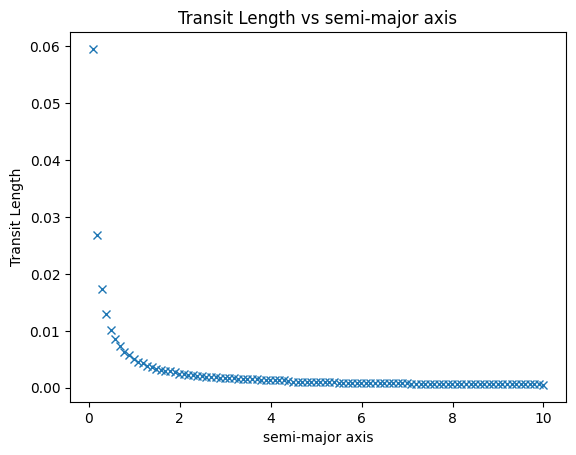

In [46]:
a_list2 = np.linspace(0.08215, 10, 100)
planet_params_new = planet_params.copy()
planet_params_new[0][3] = 0.5
planet_params_new[0][2] = 3.2
period = planet_params_new[0][2]
# Increase e so effect is more prominent
times_input_2 = np.linspace(0, 2 * 30, 600000)  # Lets go higher time resolution
fluxes = get_fluxes_for_param(stellar_params, times_input_2, planet_params_new, 1, a_list2)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    # plt.title(f"Period = {a_list2[i]}")
    # plt.plot(times_input_2, flux)
    # plt.show()
    transit_times.append(determine_transit_length(times_input_2, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input_2 - mid_transit_time[i] - period)
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i] - period)
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i] - period)
    # plot_param(r"$\omega$", [e_list_2[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))

plt.plot(a_list2, transit_length, "x")
plt.title("Transit Length vs semi-major axis")
plt.xlabel("semi-major axis")
plt.ylabel("Transit Length")
plt.show()

Flat Lining seems to suggest that it was a resolution issue -> Checks out as no dependance on a in the flux calcualtion.

An assumption that holds fairly strong due to the negligable star to planet distance compared to Earth System distance. 

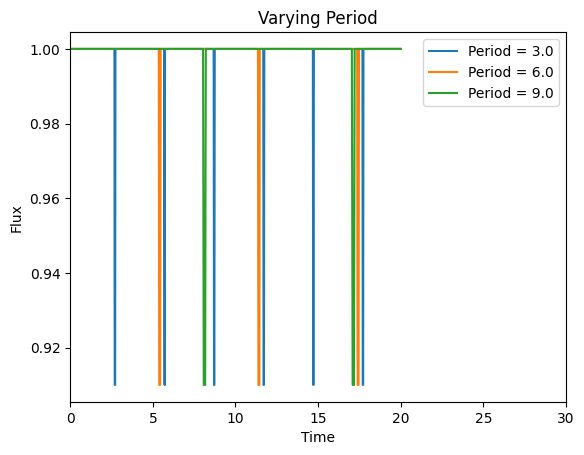

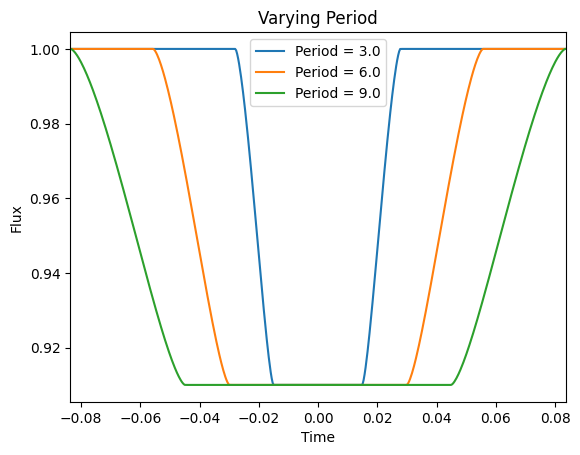

In [47]:
planet_params_new = planet_params.copy()
# Increase e so effect is more prominent
planet_params_new[0][3] = 0.5
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 2, p_list)
plot_param(r"Period", p_list, times_input, fluxes)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    transit_times.append(determine_transit_length(times_input, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input - mid_transit_time[i])
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i])
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i])
    # plot_param(r"$\omega$", [p_list[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))


plot_param(r"Period", p_list, zero_time, fluxes, time_bounds=(np.min(lower_bounds), np.max(higher_bounds)))

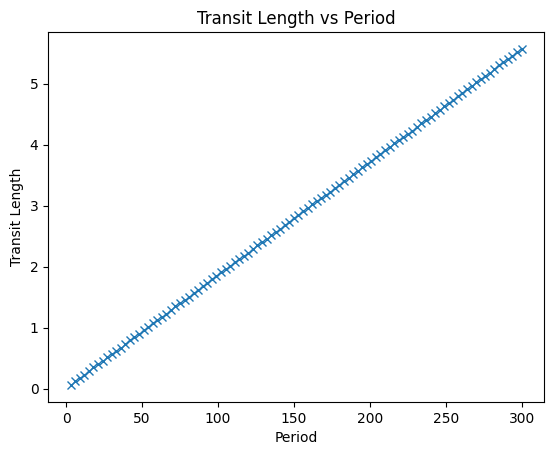

In [48]:
p_list_2 = np.linspace(3, 300, 100)
planet_params_new = planet_params.copy()
planet_params_new[0][3] = 0.5
# Increase e so effect is more prominent
times_input_2 = np.linspace(0, 2 * 300, 60000)  # Lets go higher time resolution
fluxes = get_fluxes_for_param(stellar_params, times_input_2, planet_params_new, 2, p_list_2)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    # plt.title(f"Period = {p_list_2[i]}")
    # plt.plot(times_input_2, flux)
    # plt.show()
    transit_times.append(determine_transit_length(times_input_2, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input_2 - mid_transit_time[i] - p_list_2[i])
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i] - p_list_2[i])
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i] - p_list_2[i])
    # plot_param(r"$\omega$", [e_list_2[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))

plt.plot(p_list_2, transit_length, "x")
plt.title("Transit Length vs Period")
plt.xlabel("Period")
plt.ylabel("Transit Length")
plt.show()

The above clearly shows the transit time increases

But

Does Period effect depth?

100 0.3


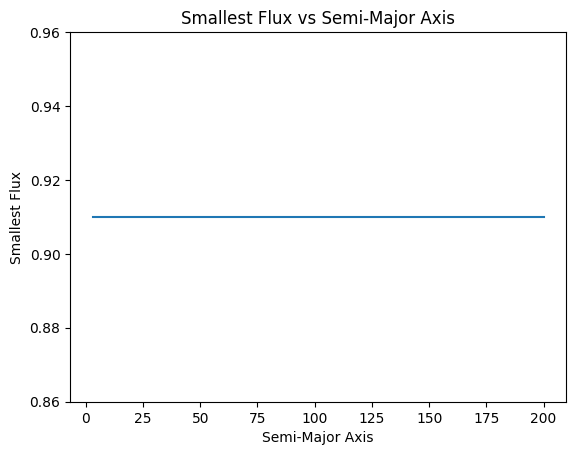

In [49]:

smallest_flux = []
p_list2 = np.linspace(3, 200, 100)
times_input_2 = np.linspace(0, 2 * 200, 600000)  # Lets go higher time resolution

fluxes2 = get_fluxes_for_param(stellar_params, times_input_2, planet_params_new, 1, p_list2)
for i in fluxes2:
    smallest_flux.append(min(i))

print(len(smallest_flux), planet_params[0][0])

plt.plot(p_list2, smallest_flux)
plt.title("Smallest Flux vs Semi-Major Axis")
plt.xlabel("Semi-Major Axis")
plt.ylabel("Smallest Flux")

plt.show()

It seems like it does not

Now Eccentricity

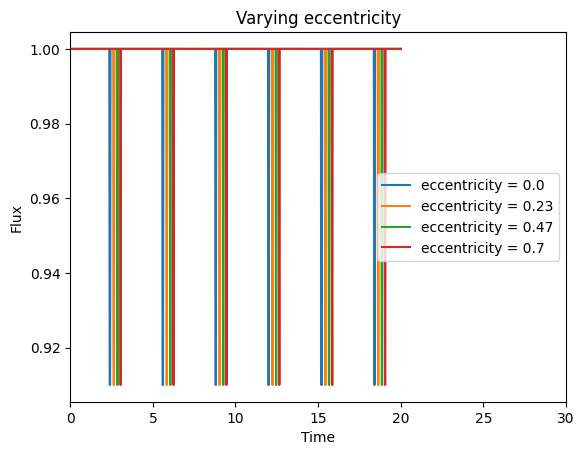

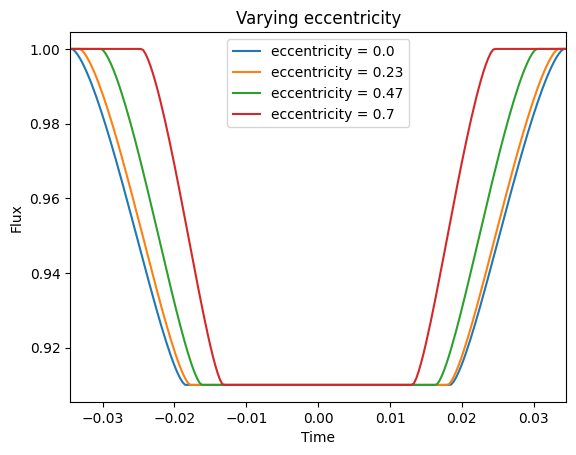

In [50]:
planet_params_new = planet_params.copy()
# Increase e so effect is more prominent
planet_params_new[0][3] = 0.5
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 3, e_list)
plot_param(r"eccentricity", e_list, times_input, fluxes)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    transit_times.append(determine_transit_length(times_input, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input - mid_transit_time[i])
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i])
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i])
    # plot_param(r"$\omega$", [e_list[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))


plot_param(r"eccentricity", e_list, zero_time, fluxes, time_bounds=(np.min(lower_bounds), np.max(higher_bounds)))

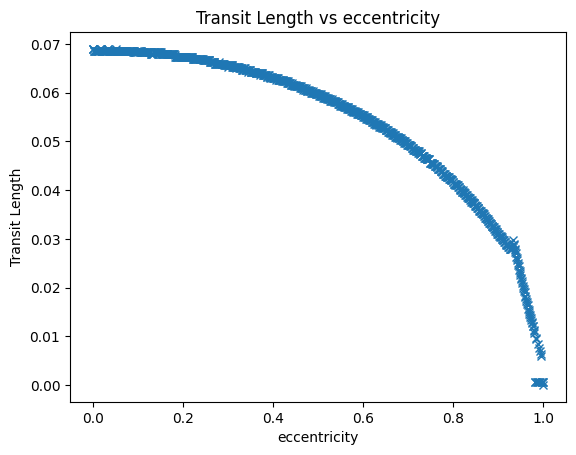

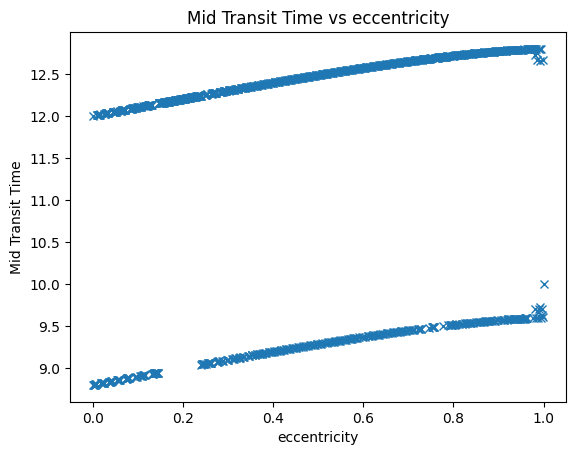

In [59]:
period = planet_params[0][2]
e_list_2 = np.linspace(0, 1, 1000)
planet_params_new = planet_params.copy()
# Increase e so effect is more prominent
times_input_2 = np.linspace(0, 2 * 10, 600000)  # Lets go higher time resolution
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 3, e_list_2)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    transit_times.append(determine_transit_length(times_input, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input - mid_transit_time[i] - period)
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i] - period)
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i] - period)
    # plot_param(r"$\omega$", [e_list_2[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))

plt.plot(e_list_2, transit_length, "x")
plt.title("Transit Length vs eccentricity")
plt.xlabel("eccentricity")
plt.ylabel("Transit Length")
plt.show()

plt.plot(e_list_2, mid_transit_time, "x")
plt.title("Mid Transit Time vs eccentricity")
plt.xlabel("eccentricity")
plt.ylabel("Mid Transit Time")
plt.show()

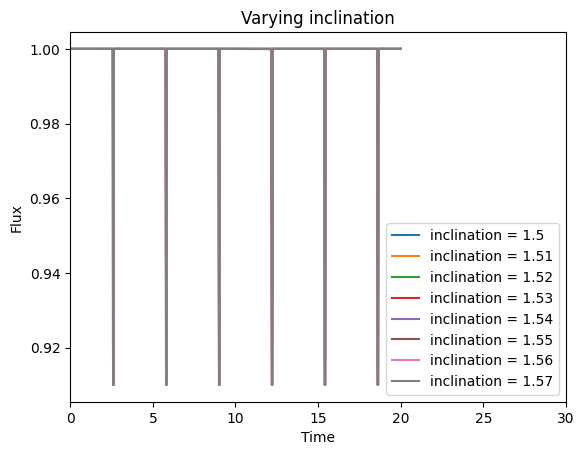

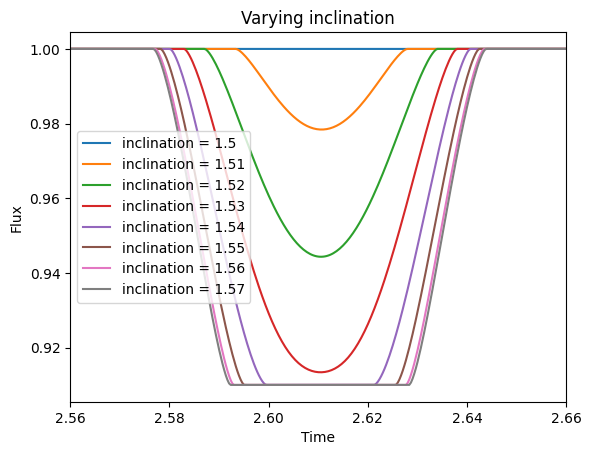

In [52]:
planet_params_new = planet_params.copy()
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 4, inc_list)
plot_param(r"inclination", inc_list, times_input, fluxes)
plot_param(r"inclination", inc_list, times_input, fluxes, time_bounds = (2.56,2.66))


What relation with depth?

100 0.3


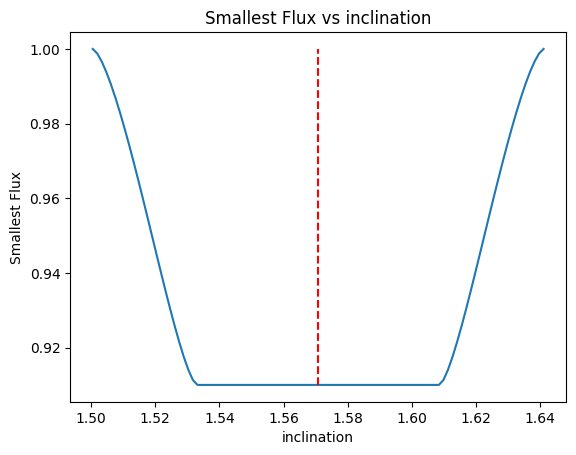

In [53]:
planet_params_new = planet_params.copy()
times_input_2 = np.linspace(0, 2 * 10, 600000)  # Lets go higher time resolution
inc_list2 = np.linspace(critical_inc, np.pi/2 + (np.pi/2 - critical_inc), 100)
fluxes2 = get_fluxes_for_param(stellar_params, times_input_2, planet_params_new, 4, inc_list2)
smallest_flux = []
for i in fluxes2:
    smallest_flux.append(min(i))

print(len(smallest_flux), planet_params[0][0])

plt.plot(inc_list2, smallest_flux)
plt.title("Smallest Flux vs inclination")
plt.xlabel("inclination")
plt.vlines(np.pi/2, min(smallest_flux), max(smallest_flux), color = "red", linestyles='dashed')
plt.ylabel("Smallest Flux")

plt.show()

In [54]:
len(omega_list)


10

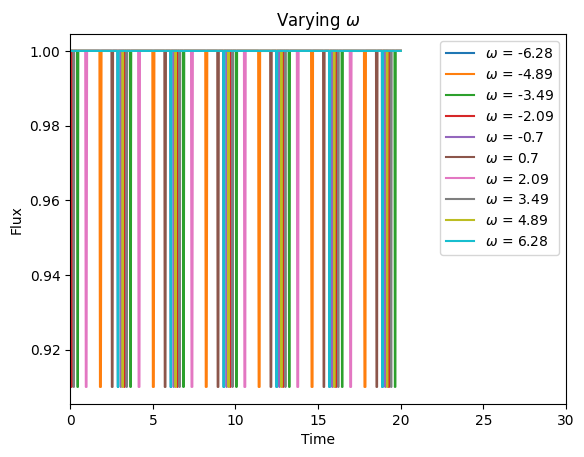

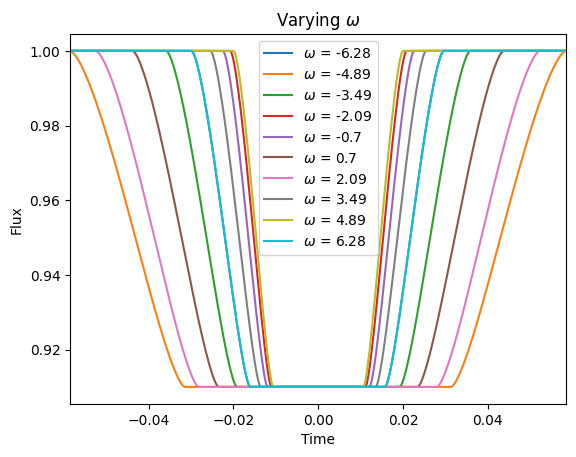

In [55]:
planet_params_new = planet_params.copy()
# Increase e so effect is more prominent
planet_params_new[0][3] = 0.5
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 5, omega_list)
plot_param(r"$\omega$", omega_list, times_input, fluxes)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    transit_times.append(determine_transit_length(times_input, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input - mid_transit_time[i])
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i])
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i])
    # plot_param(r"$\omega$", [omega_list[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))


plot_param(r"$\omega$", omega_list, zero_time, fluxes, time_bounds=(np.min(lower_bounds), np.max(higher_bounds)))

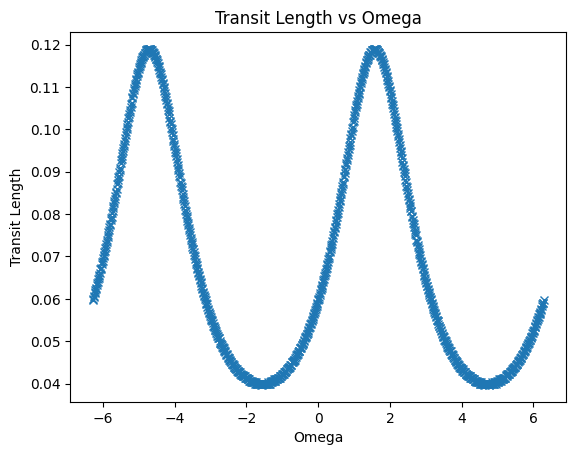

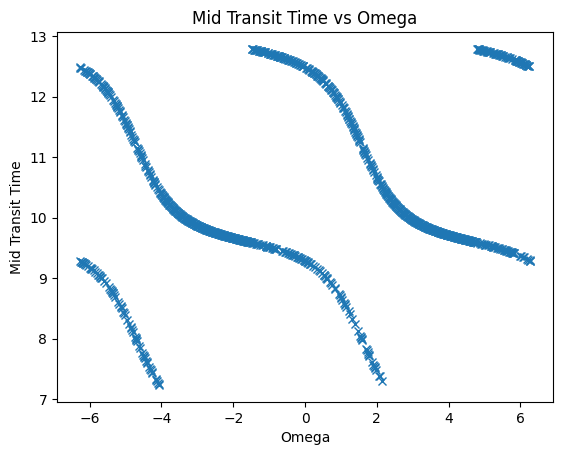

In [60]:
period = planet_params[0][2]
omega_list_2 = np.linspace(-2*np.pi, 2*np.pi, 1000)
planet_params_new = planet_params.copy()
# Increase e so effect is more prominent
planet_params_new[0][3] = 0.5
times_input_2 = np.linspace(0, 2 * 10, 600000)  # Lets go higher time resolution
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 5, omega_list_2)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    transit_times.append(determine_transit_length(times_input, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input - mid_transit_time[i] - period)
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i] - period)
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i] - period)
    # plot_param(r"$\omega$", [omega_list[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))

plt.plot(omega_list_2, transit_length, "x")
plt.title("Transit Length vs Omega")
plt.xlabel("Omega")
plt.ylabel("Transit Length")
plt.show()

plt.plot(omega_list_2, mid_transit_time, "x")
plt.title("Mid Transit Time vs Omega")
plt.xlabel("Omega")
plt.ylabel("Mid Transit Time")
plt.show()



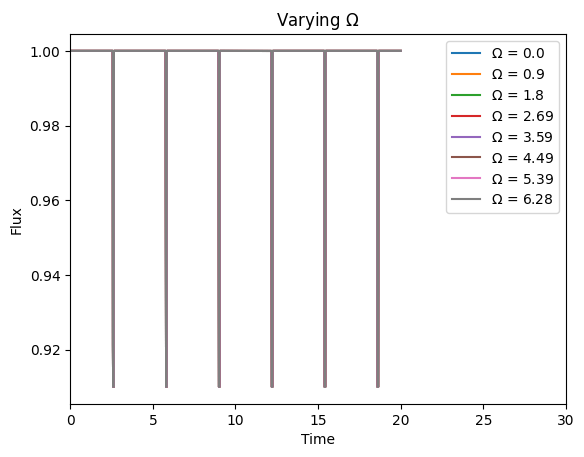

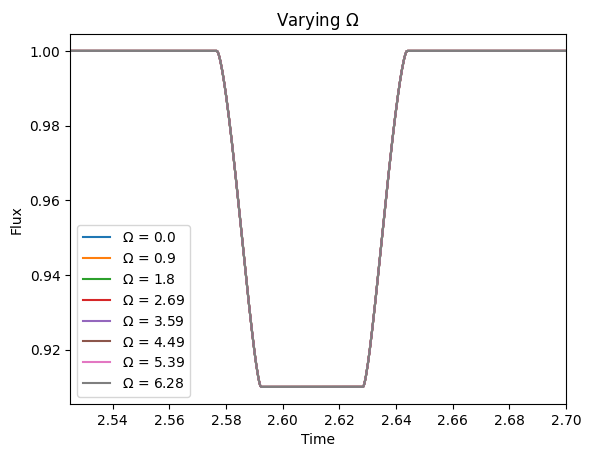

In [57]:
planet_params_new = planet_params.copy()
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 6, ohm_list)
plot_param(r"$\Omega$", ohm_list, times_input, fluxes)

plot_param(r"$\Omega$", ohm_list, times_input, fluxes, time_bounds = (2.525,2.7))

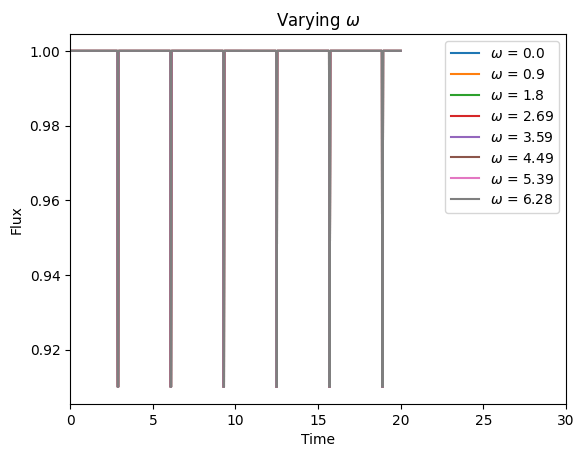

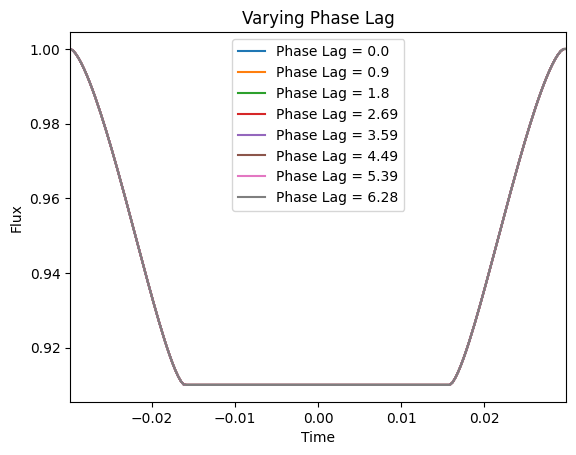

In [58]:
planet_params_new = planet_params.copy()
# Increase e so effect is more prominent
planet_params_new[0][3] = 0.5
fluxes = get_fluxes_for_param(stellar_params, times_input, planet_params_new, 6, phase_lag_list)
plot_param(r"$\omega$", phase_lag_list, times_input, fluxes)

transit_times = []
transit_length = []
mid_transit_time = []
lower_bounds = []
higher_bounds = []
zero_time = []
for i, flux in enumerate(fluxes):
    transit_times.append(determine_transit_length(times_input, flux))
    transit_length.append(transit_times[i][-1] - transit_times[i][0])
    mid_transit_time.append((transit_times[i][-1] + transit_times[i][0])/2)
    zero_time.append(times_input - mid_transit_time[i])
    # print(zero_time, times_input, mid_transit_time[i])
    lower_bounds.append(transit_times[i][0] - mid_transit_time[i])
    higher_bounds.append(transit_times[i][-1] - mid_transit_time[i])
    # plot_param(r"$\omega$", [omega_list[i]], zero_time[i], [flux], time_bounds=(lower_bounds[i], higher_bounds[i]))


plot_param(r"Phase Lag", phase_lag_list, zero_time, fluxes, time_bounds=(np.min(lower_bounds), np.max(higher_bounds)))